## Finding the Distance Between Two Points

In [1]:
import numpy as np	
def distance(p1,p2):
	"""Finds the distance between points p1 & p2"""
	return np.sqrt(np.sum(np.power(p2-p1,2)))
p1 = np.array([1,1])
p2 = np.array([4,4])

In [2]:
distance(p1,p2)


4.242640687119285

In [3]:
def majority_vote(votes):
	"""
	xxx
	"""
	vote_counts = {}
	for vote in votes:
		#known vote
		if vote in vote_counts:
			vote_counts[vote]+=1
		#unknown vote
		else:
			vote_counts[vote]=1
	return vote_counts

votes= [1,2,3,1,2,3,1,2,3,2,3,3,3,2,2]
vote_counts=majority_vote(votes)

In [4]:
vote_counts

{1: 3, 2: 6, 3: 6}

In [5]:
max(vote_counts.keys())

3

In [6]:
max_counts=max(vote_counts.values())


In [7]:
for vote, count in vote_counts.items():
	print(vote,count)


1 3
2 6
3 6


In [8]:
max_count=max(vote_counts.values())
winners=[]
for vote, count in vote_counts.items():
	if count==max_count:
		winners.append(vote)
winners

[2, 3]

## Majority Vote

In [9]:
import random
def majority_vote(votes):
	"""
	xxx
	"""
	vote_counts = {}
	for vote in votes:
		#known vote
		if vote in vote_counts:
			vote_counts[vote]+=1
		#unknown vote
		else:
			vote_counts[vote]=1
	max_count=max(vote_counts.values())
	winners=[]
	for vote, count in vote_counts.items():
		if count==max_count:
			winners.append(vote)
	return random.choice(winners)

In [10]:
majority_vote(votes)

3

In [11]:
import scipy.stats as ss
def majority_vote_short(votes):
	"""
	Return the most common element in votes
	"""
	mode, count = ss.mstats.mode(votes)
	return mode

In [12]:
majority_vote_short(votes)

array([2.])

## Finding The Nearest Neighbors

(0.5, 3.5, 0.5, 3.5)

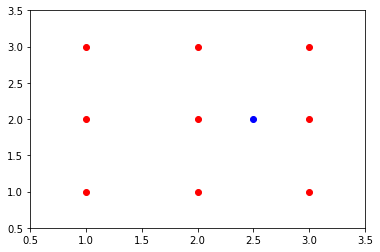

In [13]:
import numpy as np


points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p= np.array([2.5,2])

import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [14]:
#loop over all points
	#compute the distance between point p and every other point
# sort distances and return those k points that are nearest to point p
distances= np.zeros(points.shape[0])
for i in range(len(distances)):
	distances[i]=distance(p,points[i])

In [15]:
print(points[4])
distances[4]

[2 2]


0.5

In [16]:
ind=np.argsort(distances)
print(ind)
distances[ind]

[4 7 3 5 6 8 1 0 2]


array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [17]:
def find_nearest_neighbors(p, points, k=5):
	""""Find the k nearest neighbors of point p and return their indices."""
	distances= np.zeros(points.shape[0])
	for i in range(len(distances)):
		distances[i]=distance(p,points[i])
	np.argsort(distances)
	return ind[:k]



In [18]:
ind =  find_nearest_neighbors(p,points,2)
print(points[ind])

[[2 2]
 [3 2]]


In [19]:
def knn_predict(p,points,outcomes,k=5):
	ind =  find_nearest_neighbors(p,points,k)
	#predict the class of p based on majority vote
	return majority_vote(outcomes[ind])

In [20]:
outcomes=np.array([0,0,0,0,1,1,1,1,1,])
len(outcomes)

9

In [21]:
knn_predict(np.array([2.5,2.7]),points,outcomes,k=2)

1

## Generating Synthetic Data

In [22]:
import scipy.stats as ss
import numpy as np
ss.norm(0,1).rvs((5,2))
ss.norm(1,1).rvs((5,2))

array([[1.63615637, 1.79670909],
       [0.33503319, 0.80817929],
       [2.58338768, 2.27775216],
       [0.22220729, 1.12025736],
       [1.87998484, 1.10526963]])

In [23]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis=0)

array([[-0.72895523,  0.68945783],
       [-1.81486645,  0.24592955],
       [ 0.64084626, -0.31391946],
       [ 0.10332716,  0.60022435],
       [-1.14522021, -0.45230501],
       [ 1.96592143,  1.31422287],
       [ 2.65501969,  0.3211856 ],
       [-0.62825241,  2.35929835],
       [ 1.20663584, -0.22138034],
       [ 1.50862513,  0.99398933]])

In [31]:
def generate_synth_data(n=50):
	"""Create 2 sets of points from bivariate normal distributions"""
	points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
	outcomes= np.concatenate((np.repeat(0,n),np.repeat(1,n)))
	return (points,outcomes)

In [34]:
n=20
(points,outcomes) =  generate_synth_data(n)

In [35]:
points

array([[-0.18339501,  1.1368351 ],
       [-1.46577496, -1.09377373],
       [-0.35004445, -1.10164987],
       [ 0.36915953, -1.0358831 ],
       [-0.42955795, -1.2930536 ],
       [ 0.12357348, -0.66847349],
       [-0.29223335, -0.62785259],
       [-1.72947007,  1.46140708],
       [ 0.61890487, -0.05807291],
       [ 0.34484002, -1.55046393],
       [ 0.89547449, -0.14637495],
       [ 0.29576842, -1.23269812],
       [-0.81337996,  0.10052614],
       [ 0.99723961, -0.35692468],
       [-0.053509  ,  0.09041136],
       [-0.75700397, -0.62097853],
       [-0.51476963,  0.11111981],
       [ 0.3486947 , -0.09145295],
       [-1.12801172,  0.79217903],
       [-0.07914977,  1.92876773],
       [ 1.48160377, -0.1821176 ],
       [ 1.67749309,  1.58554331],
       [ 2.70949281, -0.47192167],
       [ 1.50136485,  0.05248342],
       [-0.42803364,  0.37629762],
       [ 0.2614852 ,  1.09049226],
       [-0.02969606,  1.57601621],
       [ 1.91132664,  0.6164802 ],
       [-0.58003039,

In [36]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

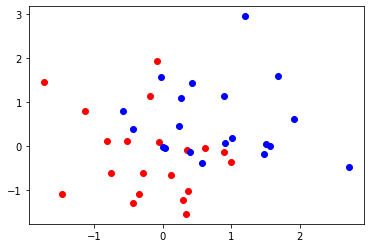

In [38]:
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")

## Making a Prediction Grid

In [71]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """ Classify each point on the prediction grid. """
    
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
            # j, i because we want to assign y values to rows of the array
            
    return (xx, yy, prediction_grid)

In [72]:
k=5
h=0.5
limits=(-1,6,0,7)
(xx,yy,prediction_grid)=make_prediction_grid(points,outcomes,limits,h,k)
# print(x)
print(xx)

[[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5

## Plotting the Prediction Grid

In [73]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)


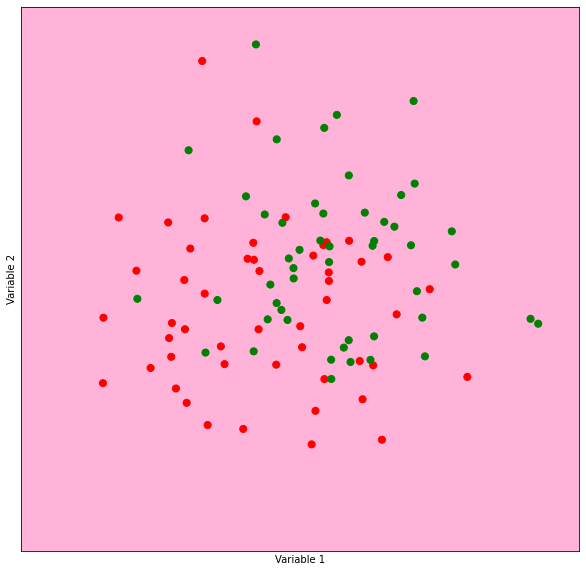

In [74]:
(predictors,outcomes) = generate_synth_data()

k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

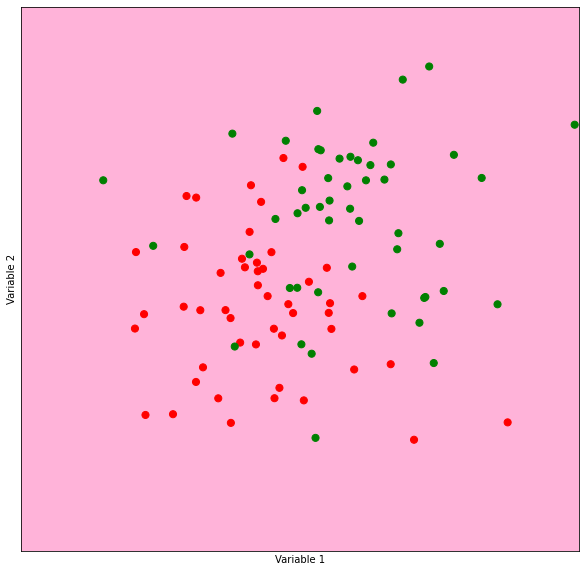

In [48]:
filename="knn_synth_50.pdf"
k=50
h=0.1
limits=(-3,4,-3,4)
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [ ]:
predictors

In [ ]:
outcomes

## Applying the kNN Method

In [51]:
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
iris["data"]

In [53]:
predictors=iris.data[:,0:2]
outcomes=iris.target

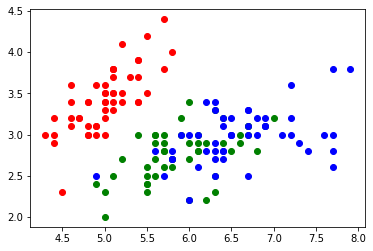

In [54]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

In [68]:
predictors.shape

(100, 2)

In [ ]:
predictors[outcomes==0]

In [57]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

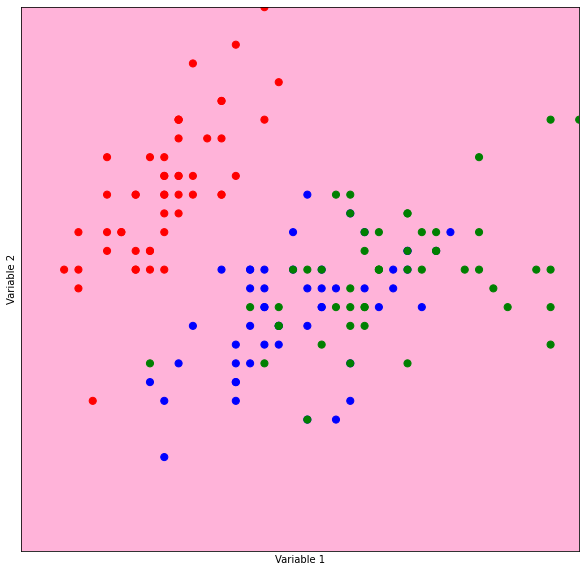

In [58]:
filename="iris_grid.pdf"
k=5
h=0.1
limits=(4,8,1.5,4.5)
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions=knn.predict(predictors)



In [61]:
sk_predictions.shape


(100,)

In [62]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
my_predictions=np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])
my_predictions.shape

(100,)

In [64]:
sk_predictions==my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [66]:
print(100*np.mean(sk_predictions==my_predictions))

49.0


In [67]:
print(100*np.mean(sk_predictions==outcomes))
print(100*np.mean(my_predictions==outcomes))


91.0
50.0
